<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/pyvista_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Started with PyVista on Google Colab

You can start using PyVista right away on Google Colab with just a two cells. The first cell below installs the system requirements and the Python packages. The second cell sets up PyVista to run on Google Colab by ensuring that plots are generated to be compatible with Google Colab.

In [ ]:
!apt-get update
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,081 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,002 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,343 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,267 kB]
Hit:13 https://ppa.launchpadcontent.n

In [ ]:
import pyvista

# Seems that only static plotting is supported by colab at the moment
pyvista.global_theme.jupyter_backend = 'static'
pyvista.global_theme.notebook = True
pyvista.start_xvfb()

In [ ]:
# This cell downloads the Lucy Angel dataset

from pyvista import examples
dataset = examples.download_lucy()
dataset

PolyData,Information
N Cells,99970
N Points,49987
N Strips,0
X Bounds,"2.259e+02, 1.156e+03"
Y Bounds,"-3.884e+02, 1.453e+02"
Z Bounds,"-6.059e+02, 9.913e+02"
N Arrays,0


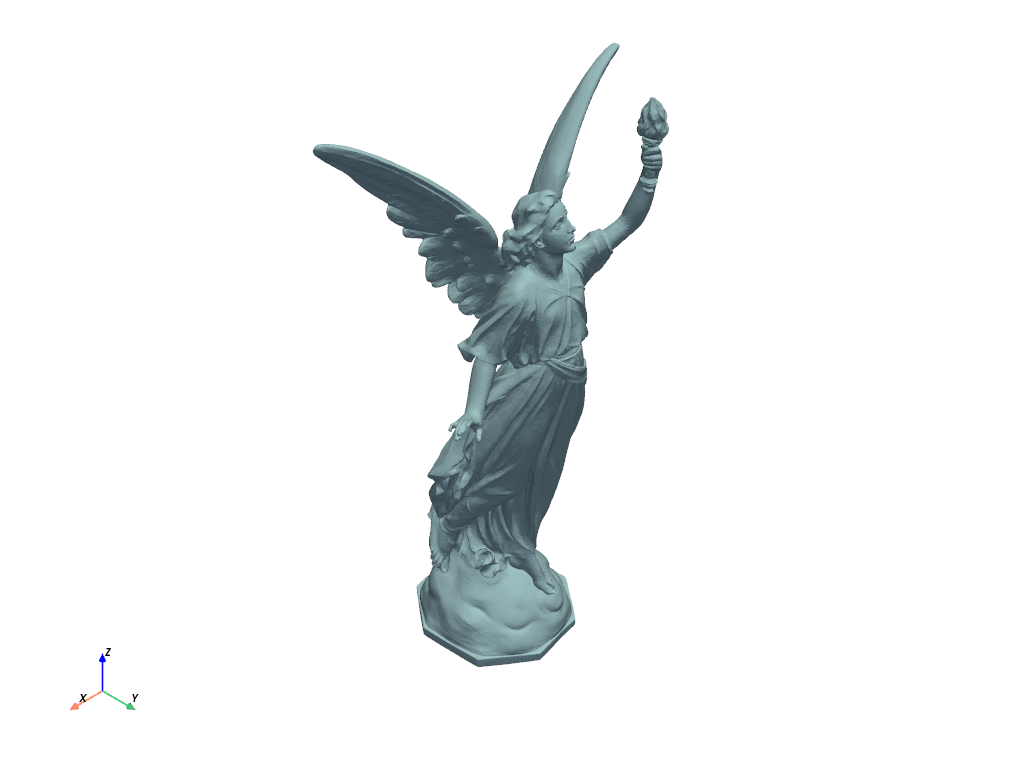

In [ ]:
# plot without any bells and whistles
dataset.plot()

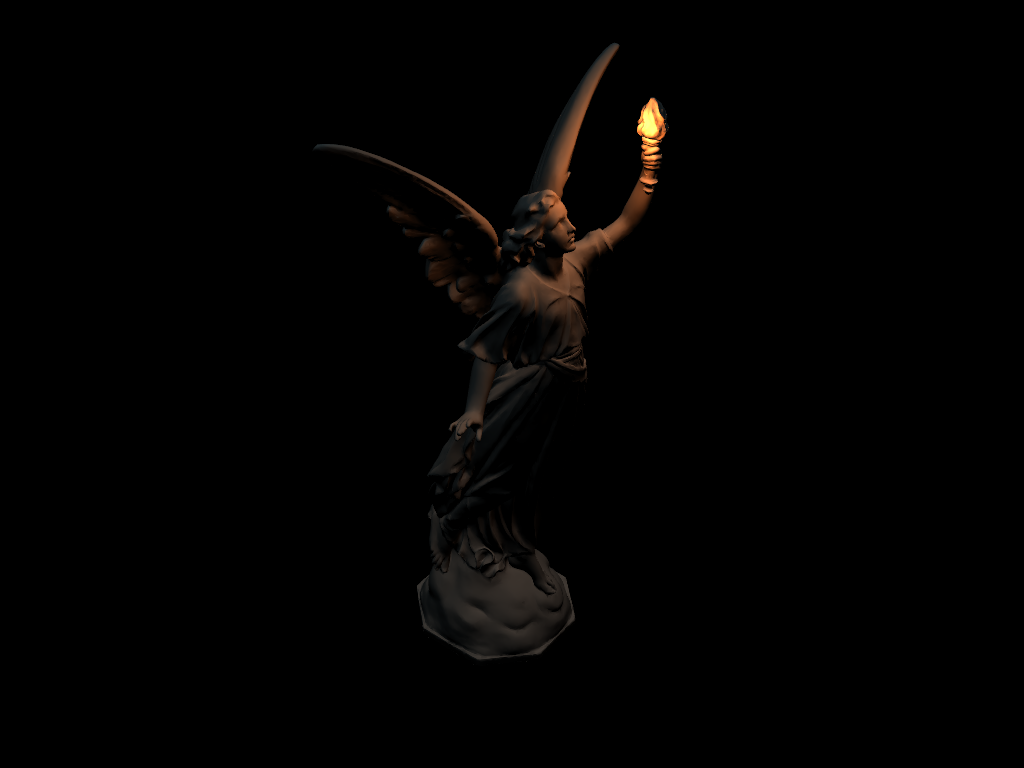

In [ ]:
# Setup a cool plot
flame_light = pyvista.Light(
    color=[0.886, 0.345, 0.133],
    position=[550,  140, 950],
    intensity=1.5,
    positional=True,
    cone_angle=90,
    attenuation_values=(0.001, 0.005, 0)
)

# create a scene light
scene_light = pyvista.Light(intensity=0.2)

# Plot the scene
pl = pyvista.Plotter(lighting=None)
_ = pl.add_mesh(dataset, smooth_shading=True)
pl.add_light(flame_light)
pl.add_light(scene_light)
pl.background_color = 'k'
pl.show()